# Lab 2: 2/10/23

### Dafni Tziakouri

### Adriana Alvaro

# 1 Gradient descent methods


## 1.1 Simple quadratic function



We begin with a simple two-dimensional function, namely

$f(x) = x_1^2 +x_2^2$ where, $x ∈ R^2$ and $x = (x1, x2)^T$

In [ ]:
# This is general
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

We will perform the next experiments:
1. Please, implement the previous algorithm with a constant $a^k = 0.1$ parameter. Take an initial point $x^0$ and perform at most 100 iterations. Try different starting points $x^0$. Observe that the algorithm always converges (up to a certain precision) to the only minimum this function has. Observe that the more the iterations, the closer to the minimum. Please, draw the path the gradient descent follows for each of the starting points $x^0$ you have studied.


2. You may try other values of α such as $α^k = 1$ and $α^k = 2$. In this case the gradient descent performs poorly due to the too bigger steps. This shows you the importance of selecting an appropriate value for the step $α$. There are many research works that have focused on this issue, but it is not the purpose of this lab to see how they work. Rather, we just will see some
of their principles.



### Experiment 1:

We will first define and plot our function in given ranges.

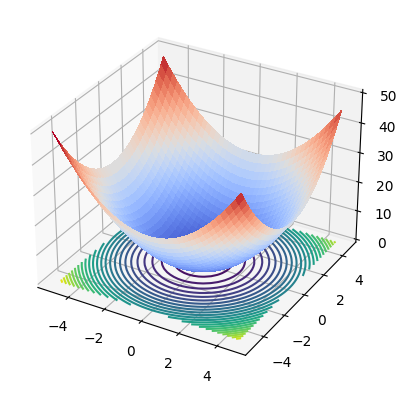

In [ ]:
# Surface to plot
X_1 = np.arange(-5, 5, 0.25)
X_2 = np.arange(-5, 5, 0.25)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = X_1**2 + X_2**2

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_1, X_2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.contour(X_1,X_2,Z,30,zdir='z',offset=0)

plt.show()

In this plot we can also see the level curves of the function.



Now we will implement the gradient descent method, but we may calculate the gradient analytically.

Gradient descent using constant step: $ x^{k+1} = x^k - \alpha^k \nabla f(x^k) $

The analitical gradient is: $ \nabla f(x) = [2x_1, 2x_2] $


In [ ]:
# constant learning rate

x_1, x_2 = sp.symbols('x_1 x_2')
f = x_1**2 + x_2**2
grad_f = [sp.diff(f, var).simplify() for var in (x_1, x_2)]

#We difine a function in which we evaluate the gradient
def eval_grad(grad_f, c_1, c_2):
  '''
  This function needs as input the gradient vector of the function and the two coordinates for which we want evaluate the grad
  '''
  valor_grad_f = np.array([grad.subs({x_1: c_1, x_2: c_2}) for grad in grad_f])

  return valor_grad_f



In the next step we define the folllowing function, in which it implements the gradient descent optimization algorithm to find the minimum of a given function $f$ starting from an initial point $x^0$. It also, records the path taken during optimization, allowing us to visualize how the algorithm converges to the minimum.

In [ ]:
def grad_path(x0, f=f, max_it=100, lr=0.1):
  x_k = x0
  x_path, y_path = [], []

  for it in range(max_it):
    x_path += [x_k[0]]
    y_path += [x_k[1]]
    # print('x_k', x_k)
    grad = eval_grad(grad_f, x_k[0], x_k[1])
    # print('grad', grad)
    x_k = x_k - lr*grad
    # print('-------------------------')

  return x_path, y_path

We will visualize how the algorithm converges to the minimum.

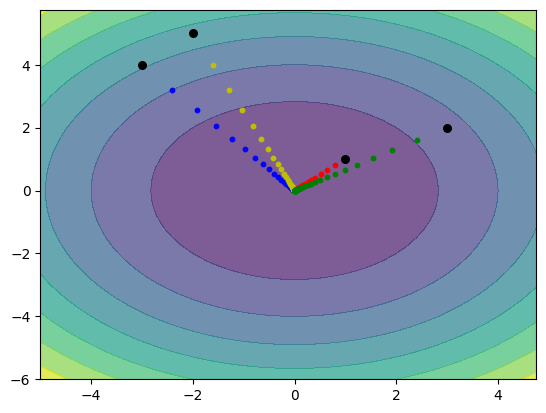

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Would you like to make the points random and generate every time new ones?

X0 = [
    [np.array([1, 1]), 'r'],
    [np.array([-3, 4]), 'b'],
    [np.array([-2, 5]), 'y'],
    [np.array([3, 2]), 'g']
] # starting points

# Create a grid for contour plotting
X_1 = np.arange(-5, 5, 0.25)
X_2 = np.arange(-6, 6, 0.25)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = X_1**2 + X_2**2
plt.contourf(X_1, X_2, Z, alpha=0.7)

# Plot gradient descent paths as dots
for x0, color in X0:
    x_path, y_path = grad_path(x0, lr=0.1)
    plt.scatter(x_path, y_path, c=color, s=10)

    # Emphasize the starting point with a different color and marker
    plt.scatter(x0[0], x0[1], c='black', s=30)

plt.show()


Eventually, all the experiments converge to the unique minimum point, which is in the center of the plot. If we change the number of iterations and print the final point, it will be shown that the method performs better when you increase the number of iterations. THat is because the method will always go in direction to the minimum.

### Experiment 2:

We will try other values of $α$ such as
$ \alpha^k = 1 $  and $ \alpha^k = 2$.

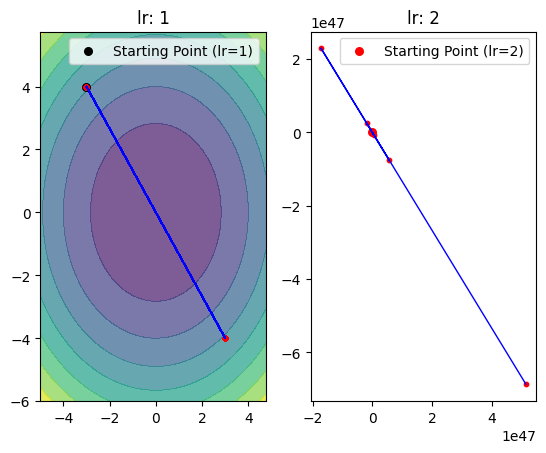

In [ ]:
# starting point
x0 = np.array([-3, 4])

# Learning rates
learning_rates = [1, 2]

# Plot gradient descent paths as points and lines for different learning rates
for i, lr in enumerate(learning_rates, start=1):
    x_path, y_path = grad_path(x0, lr=lr)
    edge_color = 'black' if i == 1 else 'red'  # Use black for the edge points

    plt.subplot(1, 2, i)
    plt.contourf(X_1, X_2, Z, alpha=0.7)

    # Plot edge points as black markers and all points as red markers
    plt.scatter(x_path[0], y_path[0], c=edge_color, s=30, label=f'Starting Point (lr={lr})')
    plt.scatter(x_path, y_path, c='red', s=10)

    # Plot lines connecting the points in a different color
    plt.plot(x_path, y_path, color='blue', linewidth=1)

    plt.title(f'lr: {lr}')
    plt.legend()

The plots are not clear enough because the gradient descent method is going back and forth over the minimum. The step is clearly way too big (especially when
 $a= 2$) for the method to reach the minimum.

## 1.2 Function with multiple minima



We now have the following function:

\begin{align}
f(x_1, x_2) &= x_1^2 \left(4 - 2.1x_1^2 + \frac{1}{3}x_1^4\right) + x_1x_2 + x_2^2 \left(-4 + 4x_2^2\right)
\end{align}

We will perform a contour plot of the previous function within the range $x_1=[-2,2]$ and $x_2=[-1,1]$.




We compute the gradient and defined both the function and it's gradient.

In [ ]:
x_1, x_2 = sp.symbols('x_1 x_2')

f = x_1**2 * (4 - 2.1*x_1**2 + 1/3*x_1**4) + x_1*x_2 + x_2**2*(-4 + 4*x_2**2)
grad_f = [sp.diff(f, var).simplify() for var in (x_1, x_2)]
print('function: ', f.simplify())
print('gradient: ', grad_f)

function:  x_1**2*(0.333333333333333*x_1**4 - 2.1*x_1**2 + 4) + x_1*x_2 + 4*x_2**2*(x_2**2 - 1)
gradient:  [2.0*x_1**5 - 8.4*x_1**3 + 8.0*x_1 + 1.0*x_2, x_1 + 16*x_2**3 - 8*x_2]


In [ ]:
def f(x_1, x_2):
  return (x_1**2 * (4 - 2.1*x_1**2 + 1/3*x_1**4) + x_1*x_2 + x_2**2*(-4 + 4*x_2**2))

def grad_f(x_1, x_2):
    return np.array([8*x_1-8.4*x_1**3+2*x_1**5+x_2, x_1 - 8*x_2+16*x_2**3])

We plot the function.

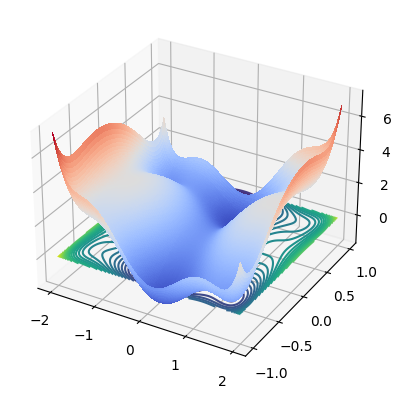

In [ ]:
# Surface to plot
X_1 = np.arange(-2, 2, 0.02)
X_2 = np.arange(-1, 1, 0.01)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = X_1**2 * (4 - 2*X_1**2 + 1/3 * X_1**4) + X_1*X_2 + X_2**2*(-4 + 4*X_2**4)

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_1, X_2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.contour(X_1,X_2,Z,30,zdir='z',offset=0)

plt.show()

**Which minima will be found?**

It depends on the starting point. With a small enough step, the algorithm will always fall into the closest minimum.

### Experiment 1:

**1.** Assume that we follow the simple gradient descent with 100 iterations
$ x^{k+1} = x^k - \alpha^k \nabla f(x^k) $

Using the plot found at step 1, try to start at different starting points $x^0$ using $α^k = 0.1$. Draw the path the minimization algorithm follows and observe to which minimum the algorithm converges.

In [ ]:
def grad_path(x0, f=f, max_it=100, lr=0.1):
  x_k = x0
  x_path, y_path = [], []

  for it in range(max_it):
    x_path += [x_k[0]]
    y_path += [x_k[1]]
    # print('x_k', x_k)
    grad = grad_f(x_k[0], x_k[1])
    # print('grad', grad)
    x_k = x_k - lr*grad
    # print('-------------------------')

  return x_path, y_path

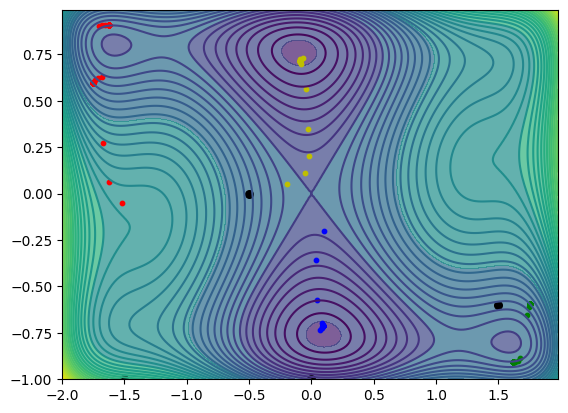

In [ ]:
plt.figure()
plt.contour(X_1, X_2, Z, 50)

X0 = [
    [np.array([-1.5, -1]), 'r'],
    [np.array([0, -1]), 'b'],
    [np.array([-0.5, 0]), 'y'],
    [np.array([1.5, -0.6]), 'g']
] # starting points

# Create a grid for contour plotting
X_1 = np.arange(-2, 2, 0.02)
X_2 = np.arange(-1, 1, 0.01)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = X_1**2 * (4 - 2*X_1**2 + 1/3 * X_1**4) + X_1*X_2 + X_2**2*(-4 + 4*X_2**4)
plt.contourf(X_1, X_2, Z, alpha=0.7)

# Plot gradient descent paths as dots
for x0, color in X0:
    x_path, y_path = grad_path(x0, f, lr=0.1)
    plt.scatter(x_path, y_path, c=color, s=10)

    # Emphasize the starting point with a different color and marker
    plt.scatter(x0[0], x0[1], c='black', s=30)

plt.show()

**2.** We will implement a gradient descent method with backtracking. The behaviour is the same except for some additions: the stopping criteria and computing alpha in each iteration. (We implemented both stopping criteria)

In [ ]:
import numpy as np

In [ ]:
def gradient_descent_adapt_alpha(x_0, f, grad, f_tol=1e-3, grad_tol=1e-5):
    x = [x_0]
    # Iterating until one of the stop criteria is fulfilled
    while True:
        alpha = 1
        # Compute new alphas until the needed condition is true.
        grad_x = grad(*x_0)
        while f(*(x_0 - alpha * grad_x)) >= f(*x_0):
            alpha /= 2

        # Same formula to compute the next iteration point
        x_0 = x_0 - alpha * grad_x
        x.append(x_0)

        # If one of the stopping criterion is satisfied, we return the history of points
        if np.abs(f(*x[-1]) - f(*x[-2])) < f_tol or np.linalg.norm(grad(*x[-1])) < grad_tol:
            return np.array(x)

    return np.array(x)


We will perform some experiments in order to check this method's behavior.

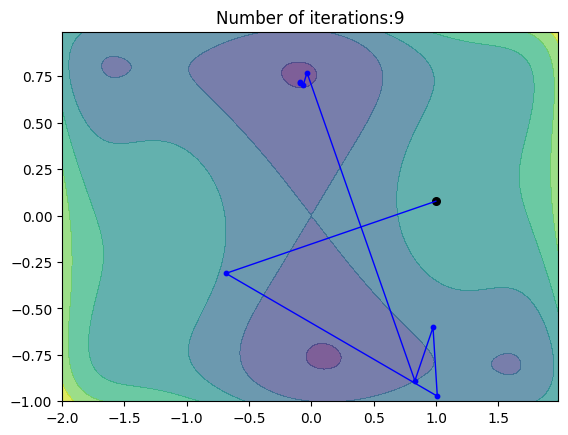

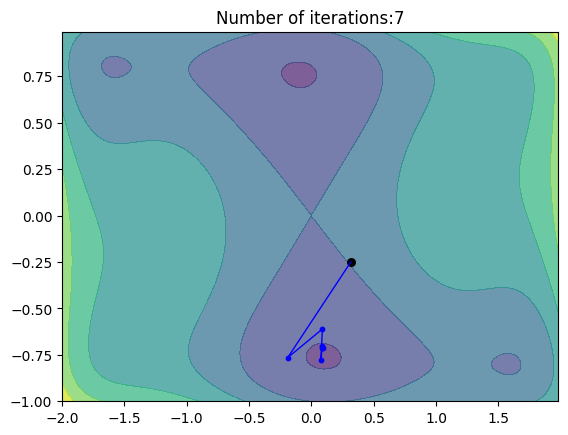

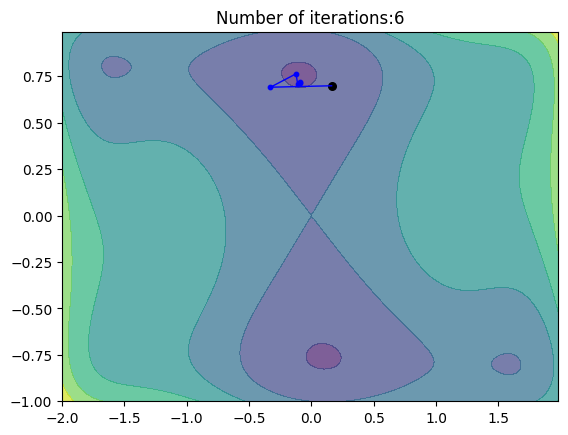

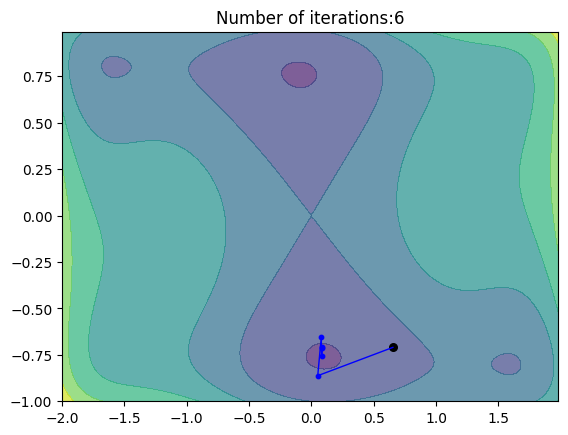

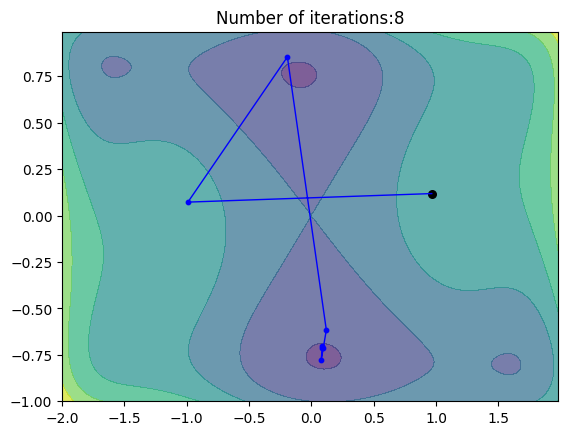

In [ ]:
for i in range(5):
  # Create a grid for contour plotting
  X_1 = np.arange(-2, 2, 0.02)
  X_2 = np.arange(-1, 1, 0.01)
  X_1, X_2 = np.meshgrid(X_1, X_2)
  Z = X_1**2 * (4 - 2*X_1**2 + 1/3 * X_1**4) + X_1*X_2 + X_2**2*(-4 + 4*X_2**4)
  plt.contourf(X_1, X_2, Z, alpha=0.7)

  # create a random starting point
  x_0 = (np.random.rand(2) - 0.5) * 2

  # build the path
  x = gradient_descent_adapt_alpha(x_0, f=f, grad=grad_f)

  # Extract x and y coordinates from the path
  path_x = [point[0] for point in x]
  path_y = [point[1] for point in x]

  # Plot the path with lines connecting the points
  plt.plot(path_x, path_y, c='blue', linewidth=1.0)

  # Plot the points individually
  plt.scatter(path_x, path_y, c='blue', s=10)

  # Emphasize the starting point with a different color and marker
  plt.scatter(x_0[0], x_0[1], c='black', s=30)

  tit = "Number of iterations:" + str(len(x))
  plt.title(tit)
  plt.show()

**How does the algorithm perform? Compare the results with the results you have obtained with a constant step. How many iterations are needed to find the minimum? 100? Or may be less?**

The algorithm always converges to one of the local minima at the horizontal center, which are global minima of this function. Our experiments show that the number of iterations to reach the minimum are generally around 6, which it seems to be a really good performance.

## 1.3 The Rosenbrock function


$ f(x_1, x_2) = (a - x_1)^2 + b(x_2 - x_1^2)^2 $

**1.** We will plot the contours of the Rosenbrock function for $a = 1$ and $b=100$. The minimum of the function is thus at $(x_1^*,x_2^*)=(1, 1)$ We will also draw the gradient information.


In [ ]:
def f_rosen(x_1, x_2, a=1, b=100):
  return (a-x_1)**2 + b*(x_2 - x_1**2)**2

def grad_f_rosen(x_1, x_2, a=1, b=100):
    return np.array([-2*(a - x_1) - 4*b*(x_2 - x_1**2)*x_1, 2*b*(x_2 - x_1**2) ])

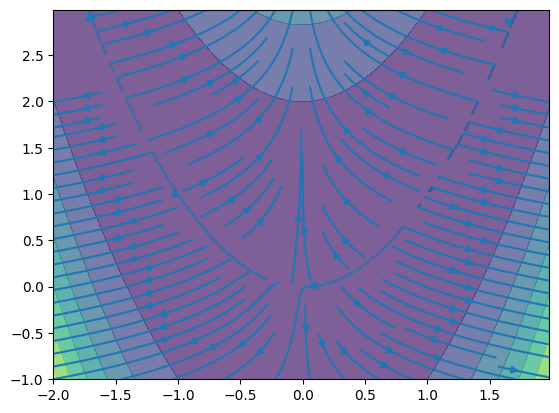

In [ ]:
a, b = 1, 100

X_1 = np.arange(-2, 2, 0.02)
X_2 = np.arange(-1, 3, 0.01)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = (a-X_1)**2 + b*(X_2 - X_1**2)**2
plt.contourf(X_1, X_2, Z, alpha=0.7)

gradx, grady = grad_f_rosen(X_1,X_2)
plt.streamplot(X_1, X_2, gradx, grady)

**2.** Now we perform the same nacktracking algorithm without limiting the iterations until the stop criterion are satisfied and see how many iterations do we need to fulfill them.

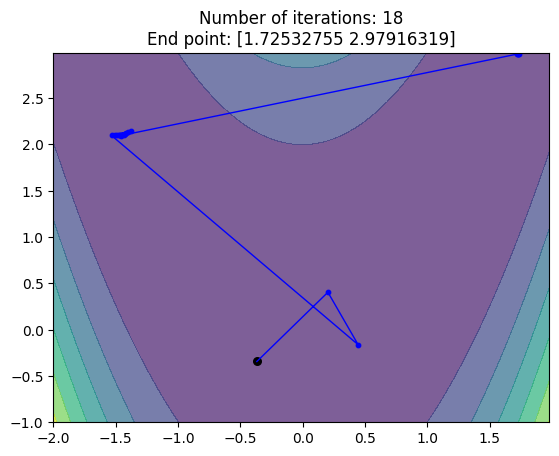

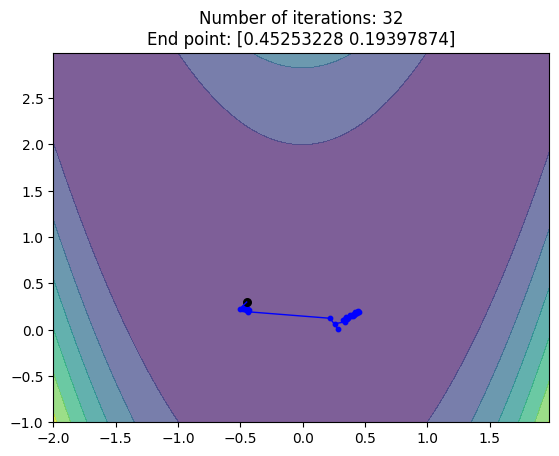

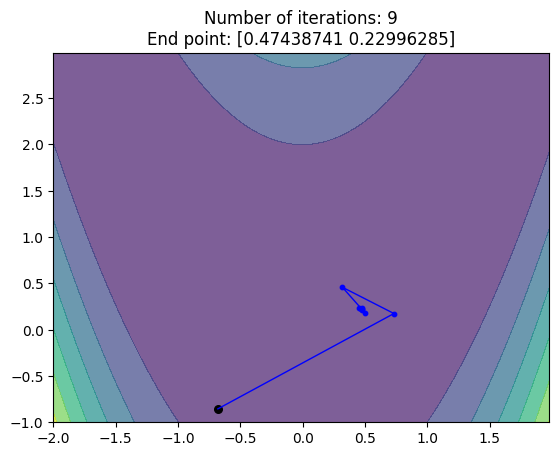

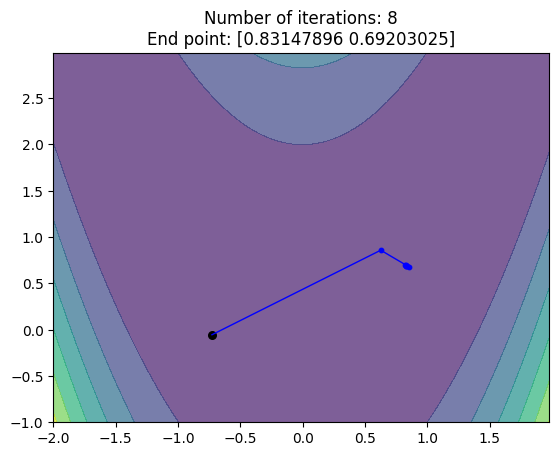

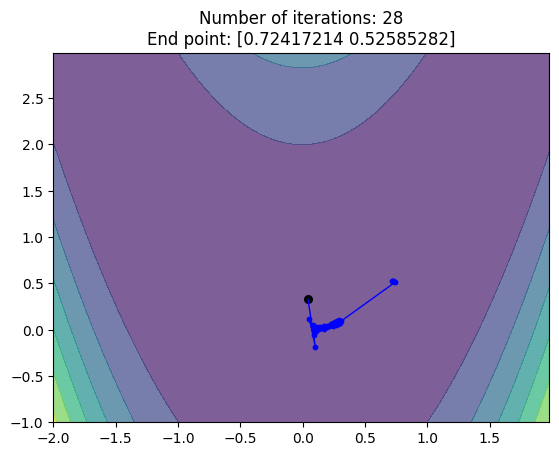

In [ ]:
for i in range(5):
  X_1 = np.arange(-2, 2, 0.02)
  X_2 = np.arange(-1, 3, 0.01)
  X_1, X_2 = np.meshgrid(X_1, X_2)
  Z = (a-X_1)**2 + b*(X_2 - X_1**2)**2
  plt.contourf(X_1, X_2, Z, alpha=0.7)

  # create a random starting point
  x_0 = (np.random.rand(2) - 0.5) * 2

  # build the path
  x = gradient_descent_adapt_alpha(x_0, f=f_rosen, grad=grad_f_rosen)

  # Extract x and y coordinates from the path
  path_x = [point[0] for point in x]
  path_y = [point[1] for point in x]

  # Plot the path with lines connecting the points
  plt.plot(path_x, path_y, c='blue', linewidth=1.0)

  # Plot the points individually
  plt.scatter(path_x, path_y, c='blue', s=10)

  # Emphasize the starting point with a different color and marker
  plt.scatter(x_0[0], x_0[1], c='black', s=30)

  tit = "Number of iterations: " + str(len(x)) + '\n' + 'End point: ' + str(x[-1])
  plt.title(tit)
  plt.show()

We see that even if the stopping criteria are satisfied, we don't reach the actual minimum which is $(x_1, x_2) = (1,1)$. If we lower the thresholds for the stopping criteria as it follow we obtain the following results:

$tol_{grad}=1e-10, tol_{f}=1e-10$




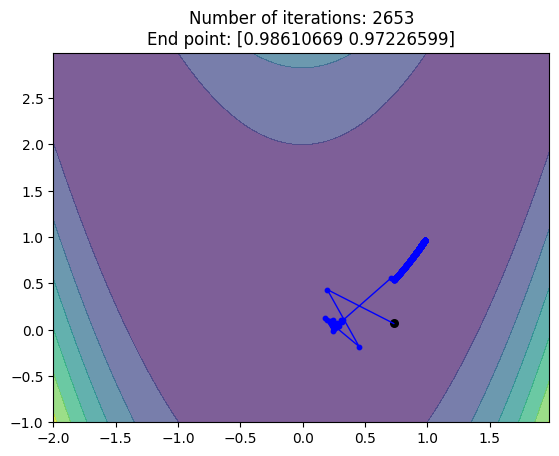

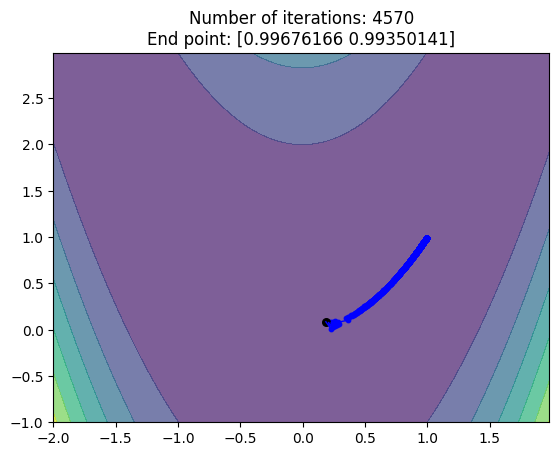

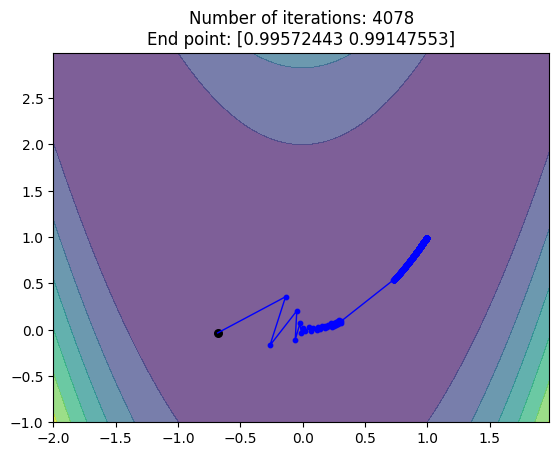

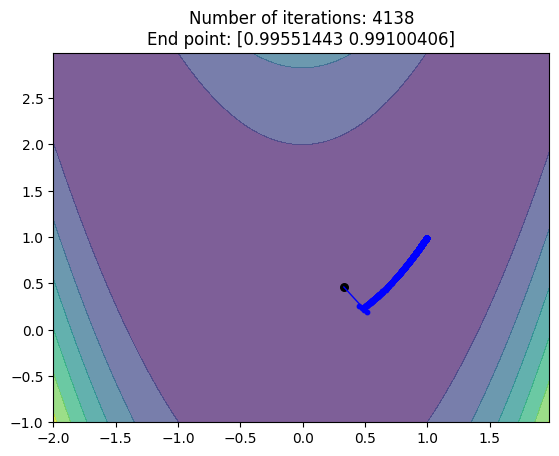

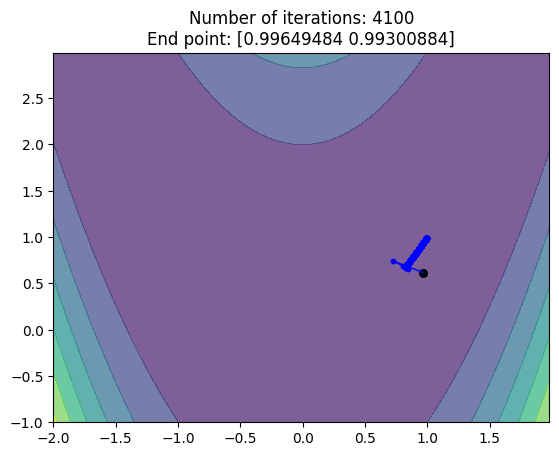

In [ ]:
for i in range(5):
  X_1 = np.arange(-2, 2, 0.02)
  X_2 = np.arange(-1, 3, 0.01)
  X_1, X_2 = np.meshgrid(X_1, X_2)
  Z = (a-X_1)**2 + b*(X_2 - X_1**2)**2
  plt.contourf(X_1, X_2, Z, alpha=0.7)

  # create a random starting point
  x_0 = (np.random.rand(2) - 0.5) * 2

  # build the path
  x = gradient_descent_adapt_alpha(x_0, f=f_rosen, grad=grad_f_rosen, grad_tol=1e-10, f_tol=1e-10)

  # Extract x and y coordinates from the path
  path_x = [point[0] for point in x]
  path_y = [point[1] for point in x]

  # Plot the path with lines connecting the points
  plt.plot(path_x, path_y, c='blue', linewidth=1.0)

  # Plot the points individually
  plt.scatter(path_x, path_y, c='blue', s=10)

  # Emphasize the starting point with a different color and marker
  plt.scatter(x_0[0], x_0[1], c='black', s=30)

  tit = "Number of iterations: " + str(len(x)) + '\n' + 'End point: ' + str(x[-1])
  plt.title(tit)
  plt.show()

We eventually reach the minimum point but with many more iterations.

# 2 Newton descent method

## 2.1 A simple quadratic function

Now we are focusing on the function:
$ f(x) = 100 x_1^2 + x_2^2 $

**1.** We will perform the previous backtracking algorithm and check how many iterations do we need to reach the minimum.

In [ ]:
def f_2(x_1, x_2):
  return(100*x_1**2 + x_2**2)

def grad_f_2(x_1, x_2):
  return np.array([200*x_1, 2*x_2])

def hess_f_2(x_1, x_2):
    return np.matrix([[200, 0], [0, 2]])

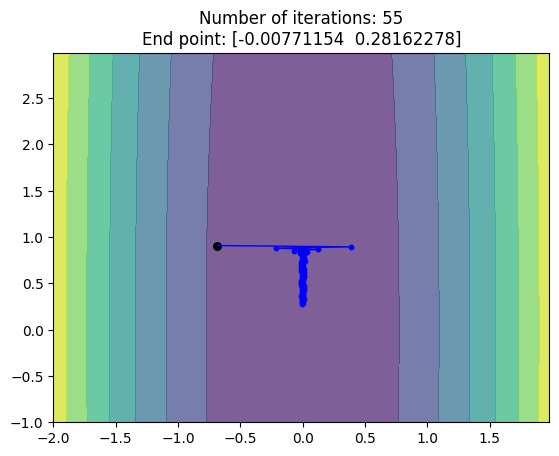

In [ ]:
X_1 = np.arange(-2, 2, 0.02)
X_2 = np.arange(-1, 3, 0.01)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = 100*X_1**2 + X_2**2
plt.contourf(X_1, X_2, Z, alpha=0.7)

# create a random starting point
x_0 = (np.random.rand(2) - 0.5) * 2

# build the path
x = gradient_descent_adapt_alpha(x_0, f=f_2, grad=grad_f_2)

# Extract x and y coordinates from the path
path_x = [point[0] for point in x]
path_y = [point[1] for point in x]

# Plot the path with lines connecting the points
plt.plot(path_x, path_y, c='blue', linewidth=1.0)

# Plot the points individually
plt.scatter(path_x, path_y, c='blue', s=10)

# Emphasize the starting point with a different color and marker
plt.scatter(x_0[0], x_0[1], c='black', s=30)

tit = "Number of iterations: " + str(len(x)) + '\n' + 'End point: ' + str(x[-1])
plt.title(tit)
plt.show()

We know that the minimum is at $(0,0)$, because the function is positive, but it is not quite reached in some of the tests.

**2.** We will try to reach a better result following the Newton direction.

In [ ]:
def newton_method_adapt_alpha(f, grad_f, hess_f, x_0, grad_tol=1e-5, f_tol=1e-3):
    x = [x_0]
    # Until one stopping criterion is fulfilled.
    while True:
        # solve the linear system of equations to compute d^k
        d_k = - np.linalg.inv(hess_f(*x_0)) * np.array([grad_f(*x_0)]).T
        # Dimension change in order to do the rest of operations easily
        d_k = np.ravel(d_k)

        # alpha is backtracked as we did before
        alpha = 1

        while f(*(x_0 + (alpha * d_k))) >= f(*x_0):
            alpha /= 2

        # The original formula
        x_0 = x_0 + alpha * d_k
        x.append(x_0)

        # Stopping criteria
        if np.abs(f(*x[-1]) - f(*x[-2])) < f_tol or np.linalg.norm(grad_f(*x[-1])) < grad_tol:
            return np.array(x)

    return np.array(x)

newton_color = np.array([[0,1,0]])

In [ ]:
#define a function to plot_function
def plot_function(f, range_x, range_y, step_x, step_y, grad_line=None, colors=None, grad=None):
    X = np.arange(range_x[0], range_x[1], step_x)
    Y = np.arange(range_y[0], range_y[1], step_y)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    # Contour plot en 2D

    plt.figure()
    plt.contour(X, Y, Z, 50)

    if grad_line is not None:
        if colors is None:
            colors = np.zeros((len(grad_line),3))
            colors[:,0] = 1
        plt.plot(*grad_line.T, zorder=1)
        plt.scatter(*grad_line.T, color=colors, zorder=2)

    if grad is not None:
        gradx, grady = grad(X,Y)
        plt.streamplot(X, Y, gradx, grady)


    plt.show()

Num of iterations:  2
Minimum candidate: (-1.1102230246251565e-16, 0.0)


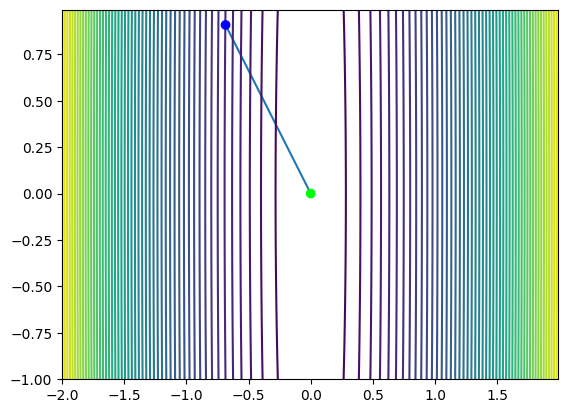

In [ ]:
x = newton_method_adapt_alpha(f_2, grad_f_2, hess_f_2, x_0)

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

print("Num of iterations: ", len(x))
print("Minimum candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(f_2, [-2,2], [-1,1], 0.01, 0.01, x, colors)

**3.** Compare the number of iterations that are needed to get to the minimum. It may also be
interesting to plot the path that each of the method follows.

Comparing the number of iterations we see that it decreased a lot, from 11 interations down to 2. This performance gives the idea of a much more efficient and direct optimization.

## 2.2 A function with multiple minima

We are using again the same fuction from Section 1.2

\begin{align}
f(x_1, x_2) &= x_1^2 \left(4 - 2.1x_1^2 + \frac{1}{3}x_1^4\right) + x_1x_2 + x_2^2 \left(-4 + 4x_2^2\right)
\end{align}

**1.** We will recover the experiments we performed in the previous sections. Indeed, we will take an initial point $x_0$, “far away” from a minimum, and
compute the number of iterations that are needed to get to the minimum.

In [ ]:
def f2d(x_1, x_2):
    return x_1**2*(4-2.1*x_1**2 + (1/3)*x_1**4) + x_1*x_2 + x_2**2*(-4+4*x_2**2)

def grad2d(x_1, x_2):
    return np.array([8*x_1-8.4*x_1**3+2*x_1**5+x_2, x_1 - 8*x_2+16*x_2**3])

# Here we define the hessian matrix
def hess2d(x_1, x_2):
    hess = np.matrix('0 1; 1 0')
    hess[0, 0] = 8-25.2*x_1**2+10*x_1**4
    hess[1, 1] = -8 + 48*x_2**2
    return hess

Num of iterations:  6
Minimum candidate: (-0.08998150354389789, 0.7127096027076463)


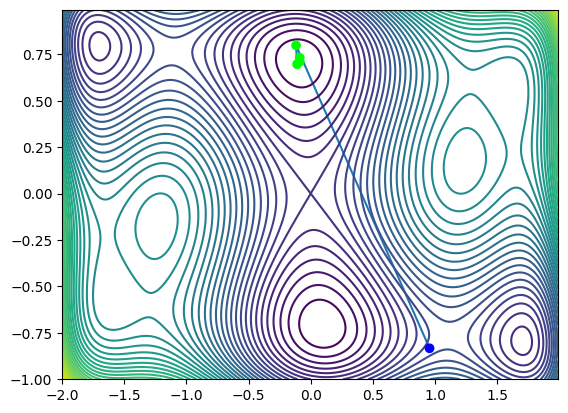

Num of iterations:  2
Minimum candidate: (0.9558243205688238, -0.8331061657920192)


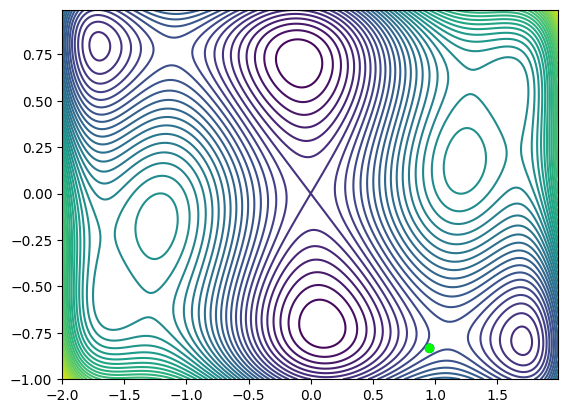

In [ ]:
# Surface to plot
X_1 = np.arange(-2, 2, 0.02)
X_2 = np.arange(-1, 1, 0.01)
X_1, X_2 = np.meshgrid(X_1, X_2)
Z = X_1**2 * (4 - 2*X_1**2 + 1/3 * X_1**4) + X_1*X_2 + X_2**2*(-4 + 4*X_2**4)

# create a random starting point
x_0 = (np.random.rand(2) - 0.5) * 2

# build the path
x = gradient_descent_adapt_alpha(x_0, f=f2d, grad=grad2d)

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

print("Num of iterations: ", len(x))
print("Minimum candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(f2d, [-2,2], [-1,1], 0.01, 0.01, x, colors)


x = newton_method_adapt_alpha(f2d, grad2d, hess2d, x_0)

colors[0] = np.array([0,0,1])

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

print("Num of iterations: ", len(x))
print("Minimum candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(f2d, [-2,2], [-1,1], 0.01, 0.01, x, colors)



In this experiment, we can notice the same phenomena. Even though the number of iterations is not much lower in the last implementation, we can observe that the path taken is much less of a zig-zag path.



**2.** At this point we will implement a new adaptative method where in each iteration either Newton method or gradient descent are chosen as the path to follow.

In [ ]:
def gradient_newton_adapt_alpha(f, grad_f, hess_f, x_0, grad_tol=1e-5, f_tol=1e-3):
    x = [x_0]
    colors = [np.array([0,0,1])]
    while True:
        # Evaluate the hessian and compute its eigenvalue
        hessian_x = hess_f(*x_0)
        eigvals = np.linalg.eigvals(hessian_x)

        # If all the eigvals are positive, we execute the Newton method (as in previous iterations)
        if np.all(eigvals > 0):
            d_k = - np.linalg.inv(hessian_x) * np.array([grad_f(*x_0)]).T
            d_k = np.ravel(d_k)
            colors.append(newton_color[0]) # To paint the point in a definite color

        # Otherwise, gradient descent is followed
        else:
            d_k = - grad_f(*x_0) # We will name the gradient value d_k in order to simplify the code.
            colors.append(newton_color[0]) # To paint the point in a definite color

        # Backtracking alpha
        alpha = 1
        while f(*(x_0 + (alpha * d_k))) >= f(*x_0):
            alpha /= 2

        # As the meaning of d_k may change, this formula may implement either Newton Method or gradient descent in each iteration
        x_0 = x_0 + alpha * d_k
        x.append(x_0)

        # Stopping criteria
        if np.abs(f(*x[-1]) - f(*x[-2])) < f_tol or np.linalg.norm(grad_f(*x[-1])) < grad_tol:
            return np.array(x), np.array(colors)

    return np.array(x), np.array(colors)

Num of iterations:  6
Minimum candidate: (0.08990543756094353, -0.712635587273176)


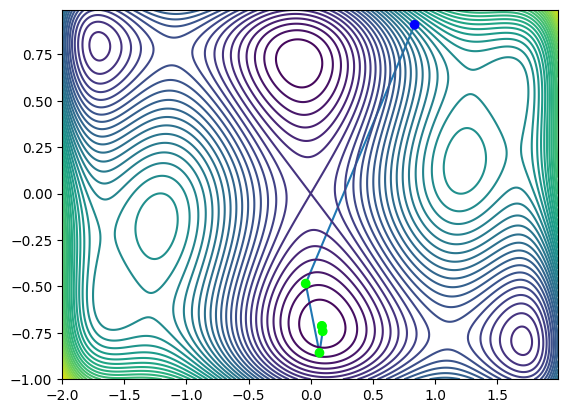

In [ ]:
x_0 = (np.random.rand(2) - 0.5) * 2

x, colors = gradient_newton_adapt_alpha(f2d, grad2d, hess2d, x_0)

print("Num of iterations: ", len(x))
print("Minimum candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(f2d, [-2,2], [-1,1], 0.01, 0.01, x, colors)

So, near the minimum Newton method has been used.

**3.** We will compare the Newton method with the pure gradient descent. Also, we will test how many iterations are required to arrive to the minimum and
compare the path that each of the method follows to arrive to the minimum.

Number of iterations: 5
Minimum candidate: (0.08600221058696142, -0.7415635840148131)


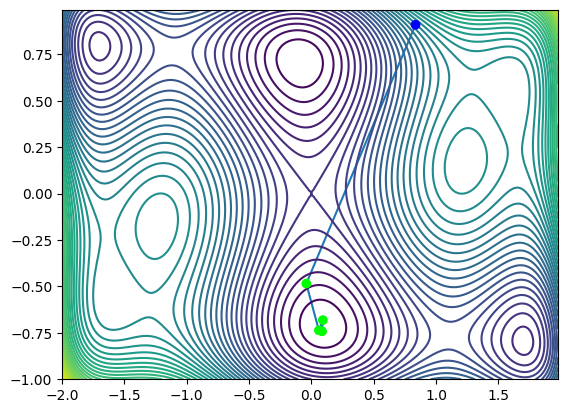

In [ ]:
x = gradient_descent_adapt_alpha(x_0, f2d, grad2d)

print("Number of iterations:", len(x))
print("Minimum candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

plot_function(f2d, [-2,2], [-1,1], 0.02, 0.01, x, colors)

We notice that with the combined gradient-Newthon method we need less iterations (5 iterations) than the pure gradient descent method (6 iterations). Therefore, gradient-Newton path seem to get closer to the point than

## 2.3 The Rosenbrock function


Let us consider again the Rosenbrock function, see section 1.3. Assume we take $a = 1$ and $b = 100$ for the Rosenbrock function. We are asked to perform the
next experiments:

**1.** Recover the experiments performed in section 1.3, and the initial starting points $x^0$




In [ ]:
a = 1
b = 100

def hess_rosen(x_1, x_2, a=1, b=100):
    hess = np.matrix('0 0; 0 0')
    hess[0, 0] = 2*(6*b*x_1**2-2*b*x_2+1)
    hess[0, 1] = -4*b*x_1
    hess[1, 0] = -4*b*x_1
    hess[1, 1] = 2*b
    return hess

Num of iterations:  47
Minimum candidate: (0.4512917617945735, 0.21119439445312368)


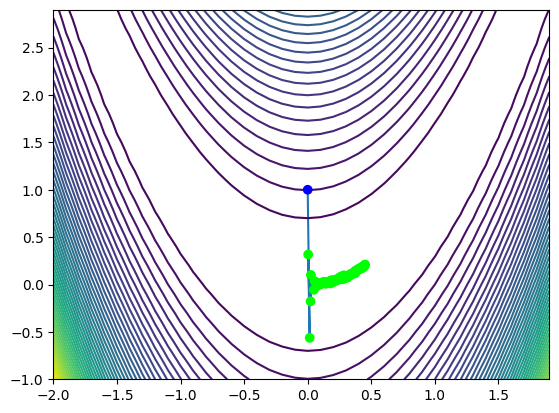

Num of iterations:  14
Minimum candidate: (0.9946278663362125, 0.9892357686141809)


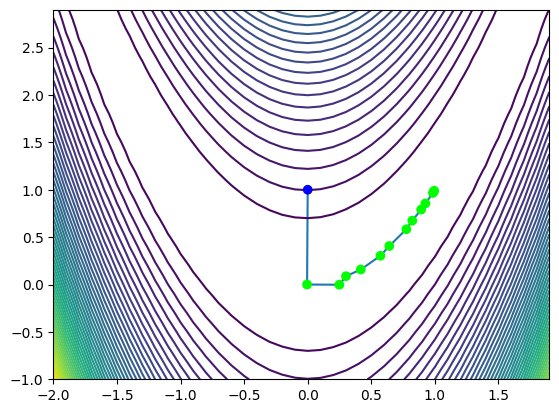

In [ ]:
x_0 = np.array([0.,1.])

x = gradient_descent_adapt_alpha(x_0, f_rosen, grad_f_rosen)

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

print("Num of iterations: ", len(x))
print("Minimum candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(h, [-2, 2], [-1, 3], 0.1, 0.1, x, colors)


x = newton_method_adapt_alpha(f_rosen, grad_f_rosen, hess_rosen, x_0)

colors = np.repeat(newton_color, len(x), axis=0)
colors[0] = np.array([0,0,1])

print("Num of iterations: ", len(x))
print("Minimum candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(f_rosen, [-2, 2], [-1, 3], 0.1, 0.1, x, colors)

The above results show that the Newton method requires less iterations (14 iterations) but reaches the minimum at (1,1) while the gradient descent requires more iterations (47 iterations) but stucks at approximately (0.45, o,21).

**2.** Try now to use the combined Newton-gradient descent algorithm and see how many iterations are required to arrive to the minimum. It is interesting to analyze which of both methods (Newton or gradient descent) is used at each iteration. Use two different colors to plot which of both methods is used at each iteration. With the Newton method you should be able to arrive to the minimum.

Num of iterations:  14
Minimum candidate: (0.9903183611021966, 0.9805673170708425)


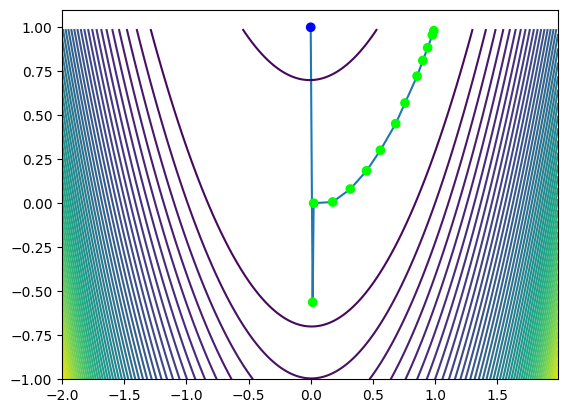

In [ ]:
x, colors = gradient_newton_adapt_alpha(f_rosen, grad_f_rosen, hess_rosen, x_0)

print("Num of iterations: ", len(x))
print("Minimum candidate: (" + str(x[-1][0]) + ", " + str(x[-1][1]) + ")")

plot_function(f_rosen, [-2,2], [-1,1], 0.01, 0.01, x, colors)

It is easy to see that the Newton-gradient method is used near the lowest level curve.